<a href="https://colab.research.google.com/github/alemskdlt/dl02/blob/main/notebook/ch03_ml_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Intro to ML
### sklearn
- iris : knn
- logits : knn
- confusiom matrix (혼동행렬)

## iris dataset


In [6]:
# iris dataset
from sklearn import datasets
iris = datasets.load_iris()

print(iris)


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [5]:
#iris.data.shape              # data라는 속성에 접근 하기 위해 .data 입력
#iris.target.shape
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


###  train-test split

In [7]:
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

# (80:20)으로 분할한다. 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [9]:
y_train.shape, y_test.shape

((120,), (30,))

### Training (학습)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [12]:
y_pred, y_test

(array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
        1, 0, 0, 0, 0, 0, 0, 2]),
 array([2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
        1, 0, 0, 0, 0, 0, 0, 2]))

In [13]:
from sklearn import metrics
scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

0.9666666666666667


### 세 데이터에 적용

In [16]:
#######################
#  Test on new data
#######################
classes = {0:'setosa',1:'versicolor',2:'virginica'}

# 전혀 보지 못한 새로운 데이터를 2개 제시해보자. 
x_new = [[3,4,5,2],
         [5,4,2,2]]

y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa


### Decision boundary

In [21]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


TypeError: ignored

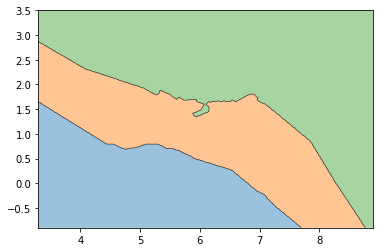

In [22]:
############################################################
# Decision boundary
# from mlxtend.plotting import plot_decision_regions
############################################################
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
# Plotting decision regions of two features
ft_names = iris.feature_names
two_feature_idx = [0,3]
X2 = iris.data[:, two_feature_idx]
y2 = iris.target
X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size=0.2,random_state=4)

knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train, y_train)

plot_decision_regions(X2, y2, clf=knn2, legend=2)
# Adding axes annotations
plt.xlabel(ft_names[two_feature_idx[0]])
plt.ylabel(ft_names[two_feature_idx[1]])
plt.title('KNN3 on Iris')
plt.show()

TypeError: ignored

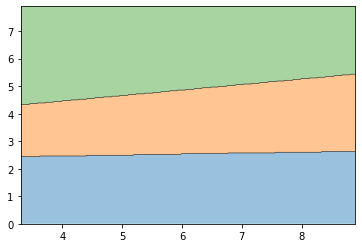

In [23]:
########################################################
# SVM
########################################################
# Training a classifier
from sklearn.svm import SVC

ft_names = iris.feature_names
two_feature_idx = [0,2]
X2 = iris.data[:, two_feature_idx]
y2 = iris.target
X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size=0.2,random_state=4)

svm = SVC(C=0.5, kernel='linear')
svm.fit(X_train, y_train)

plot_decision_regions(X2, y2, clf=svm, legend=2)
# Adding axes annotations
plt.xlabel(ft_names[two_feature_idx[0]])
plt.ylabel(ft_names[two_feature_idx[1]])
plt.title('SVM on Iris')
plt.show()
########################################################


---